In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from scipy.ndimage import morphology as morph
%matplotlib notebook

### Useful functions

In [2]:
def square_mask(sh, ctr, L):
    return rectangle_mask(sh, ctr, (L, L))

def rectangle_mask(sh, ctr, L):
    mask = np.zeros(sh, dtype=bool)
    s0 = np.clip(ctr[0]-L[0]//2, 0, sh[0]), np.clip(ctr[0]+L[0]//2, 0, sh[0])
    s1 = np.clip(ctr[1]-L[1]//2, 0, sh[1]), np.clip(ctr[1]+L[1]//2, 0, sh[1])    
    mask[s0[0]:s0[1], s1[0]:s1[1]] = True
    return mask

def disc_mask(sh, ctr, R):
    return ellipse_mask(sh, ctr, (R, R))

def ellipse_mask(sh, ctr, ab):
    i0, i1 = np.indices(sh, dtype=float) - np.array(ctr)[:, np.newaxis, np.newaxis]
    r2 = (i0/ab[0])**2 + (i1/ab[1])**2
    return (r2 <= 1.)

### Create phantom

<IPython.core.display.Javascript object>


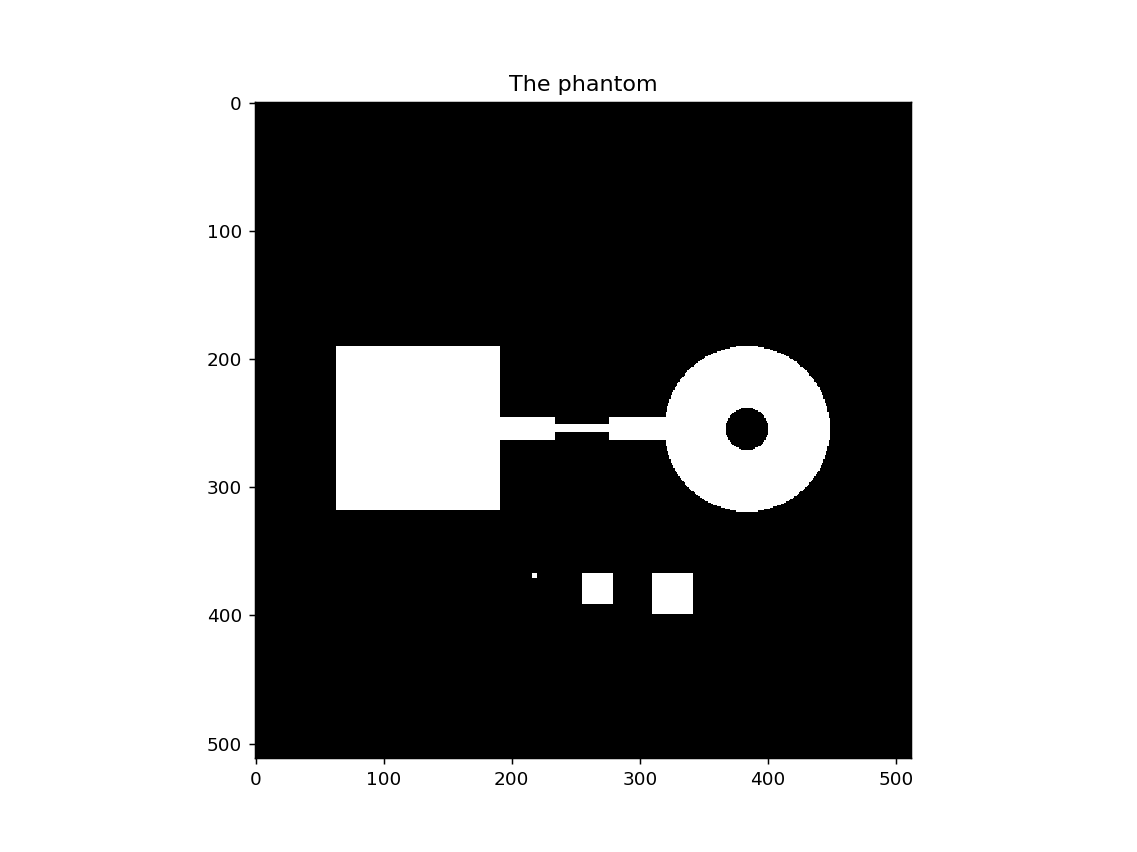

In [3]:
sh = (512, 512)
phantom = square_mask(sh, (255, 127), 128)
phantom |= rectangle_mask(sh, (255, 210), (18, 48))
phantom |= rectangle_mask(sh, (255, 255), (6, 48))
phantom |= rectangle_mask(sh, (255, 300), (18, 48))
phantom |= disc_mask(sh, (255, 383), 64.5)
phantom &= ~disc_mask(sh, (255, 383), 16.5)
phantom |= square_mask(sh,(368+2, 218), 4)
phantom |= square_mask(sh,(368+12, 267), 24)
phantom |= square_mask(sh,(368+16, 325), 32)

a = phantom

plt.figure()
plt.imshow(a, cmap='gray')
plt.title('The phantom');

### Dilation

<IPython.core.display.Javascript object>


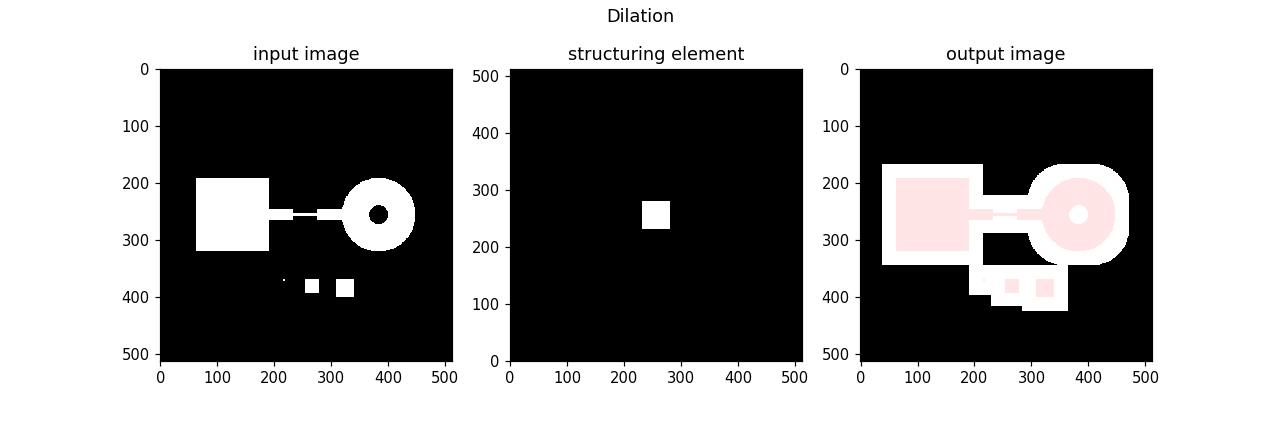

In [4]:
sx = 50
sy = 50
structure = np.ones((sy,sx))
b = np.zeros(sh)
b[int(sh[0]/2-sy/2):int(sh[0]/2+sy/2),int(sh[1]/2-sx/2):int(sh[1]/2+sx/2)] = structure
c = morph.binary_dilation(a,structure).astype('uint8')

plt.figure(figsize=(12,4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('input image')
plt.subplot(1,3,2)
plt.imshow(b,vmax=1, vmin=0, cmap='gray')
plt.xlim(0, sh[1])
plt.ylim(0, sh[0])
plt.title('structuring element')
plt.subplot(1,3,3)
cout = np.dstack([c, c - .1*a, c - .1*a])
plt.imshow(cout, cmap='gray')
plt.title('output image')
plt.suptitle('Dilation');

### Erosion

<IPython.core.display.Javascript object>


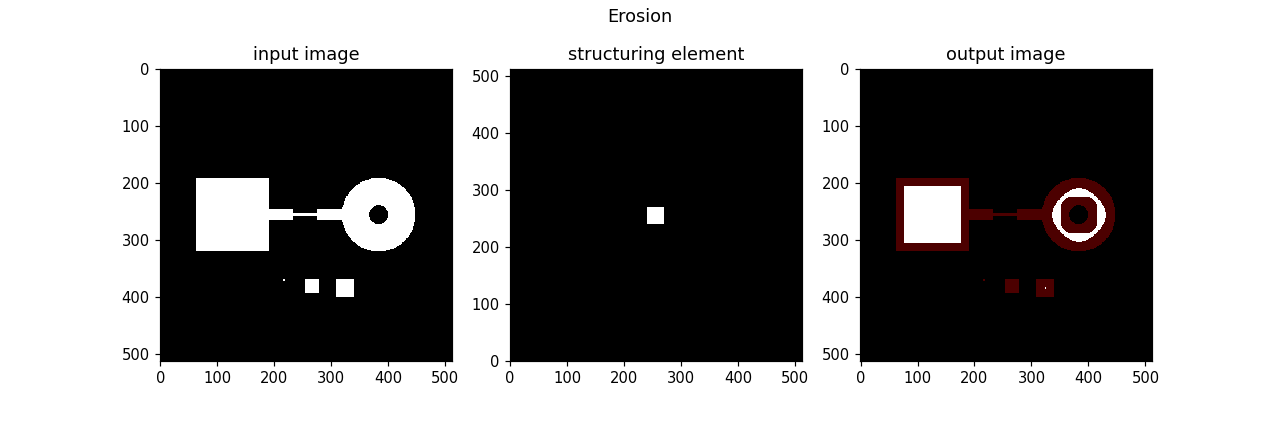

In [5]:
sx = 30
sy = 30
structure = np.ones((sy,sx))
b = np.zeros(sh)
b[int(sh[0]/2-sy/2):int(sh[0]/2+sy/2),int(sh[1]/2-sx/2):int(sh[1]/2+sx/2)] = structure
c = morph.binary_erosion(a,structure).astype('uint8')

plt.figure(figsize=(12,4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('input image')
plt.subplot(1,3,2)
plt.imshow(b,vmax=1, vmin=0, cmap='gray')
plt.xlim(0, sh[1])
plt.ylim(0, sh[0])
plt.title('structuring element')
plt.subplot(1,3,3)
cout = np.dstack([.7*c + .3*a, c, c])
plt.imshow(cout, cmap='gray')
plt.title('output image')
plt.suptitle('Erosion');

### Opening

<IPython.core.display.Javascript object>


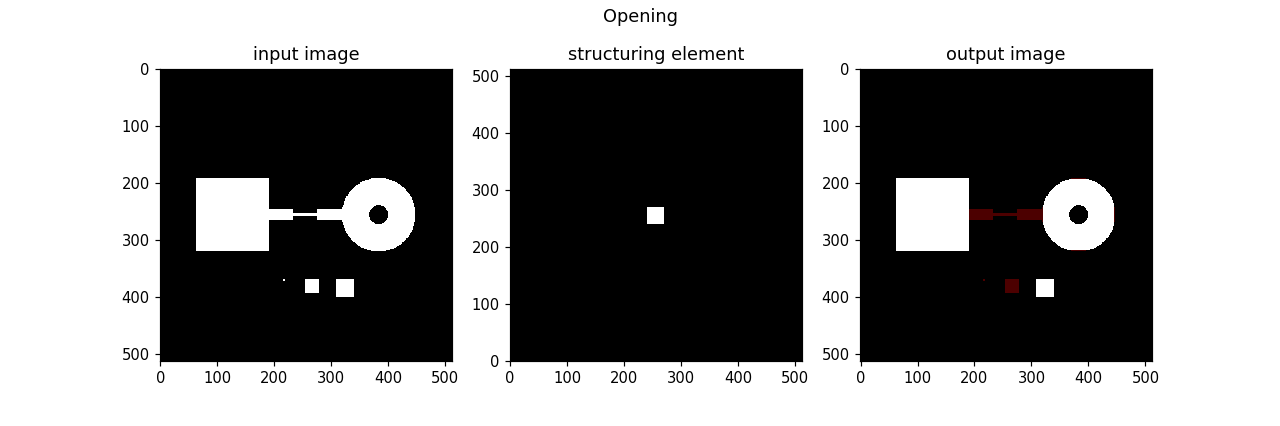

In [6]:
sx = 30
sy = 30
structure = np.ones((sy,sx))
b = np.zeros(sh)
b[int(sh[0]/2-sy/2):int(sh[0]/2+sy/2),int(sh[1]/2-sx/2):int(sh[1]/2+sx/2)] = structure
c = morph.binary_opening(a,structure).astype('uint8')

plt.figure(figsize=(12,4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('input image')
plt.subplot(1,3,2)
plt.imshow(b,vmax=1, vmin=0, cmap='gray')
plt.xlim(0, sh[1])
plt.ylim(0, sh[0])
plt.title('structuring element')
plt.subplot(1,3,3)
cout = np.dstack([.7*c + .3*a, c, c])
plt.imshow(cout, cmap='gray')
plt.title('output image')
plt.suptitle('Opening');

### Closing

<IPython.core.display.Javascript object>


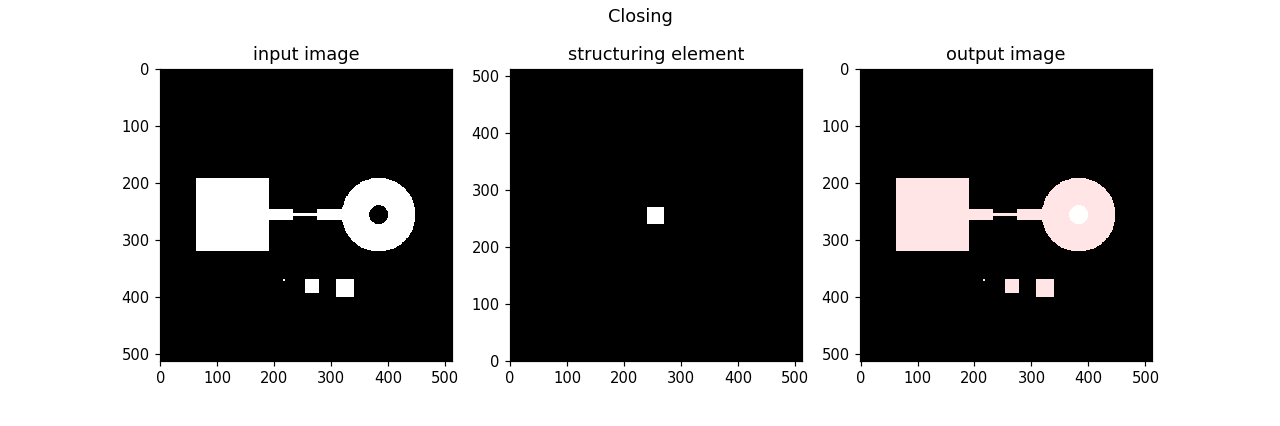

In [7]:
sx = 30
sy = 30
structure = np.ones((sy,sx))
b = np.zeros(sh)
b[int(sh[0]/2-sy/2):int(sh[0]/2+sy/2),int(sh[1]/2-sx/2):int(sh[1]/2+sx/2)] = structure
c = morph.binary_closing(a,structure).astype('uint8')

plt.figure(figsize=(12,4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('input image')
plt.subplot(1,3,2)
plt.imshow(b,vmax=1, vmin=0, cmap='gray')
plt.xlim(0, sh[1])
plt.ylim(0, sh[0])
plt.title('structuring element')
plt.subplot(1,3,3)
cout = np.dstack([c, c-.1*a, c-.1*a])
plt.imshow(cout, cmap='gray')
plt.title('output image')
plt.suptitle('Closing');